In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

data = pd.read_csv('/content/drive/MyDrive/economic_times_headlines_2022.csv')
print(data.head())

                                    Archive        Date  \
0  Archives > 2022 > January > 01 Jan, 2022  01-01-2022   
1  Archives > 2022 > January > 01 Jan, 2022  01-01-2022   
2  Archives > 2022 > January > 01 Jan, 2022  01-01-2022   
3  Archives > 2022 > January > 01 Jan, 2022  01-01-2022   
4  Archives > 2022 > January > 01 Jan, 2022  01-01-2022   

                                            Headline  \
0  Assam targeting to become six lakh crore GDP s...   
1  In Manipur BJP will form a government on its o...   
2  There will be rationalization of the Armed For...   
3  Media companies will have to create content fo...   
4  How we interact with sporting events might cha...   

                                       Headline link  
0  https://economictimes.indiatimes.com/news/indi...  
1  https://economictimes.indiatimes.com/news/elec...  
2  https://economictimes.indiatimes.com/news/indi...  
3  https://economictimes.indiatimes.com/industry/...  
4  https://economictimes.indiatim

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 108599 entries, 0 to 108598
Data columns (total 4 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   Archive        108599 non-null  object
 1   Date           108599 non-null  object
 2   Headline       108599 non-null  object
 3   Headline link  108599 non-null  object
dtypes: object(4)
memory usage: 3.3+ MB


In [ ]:
missing_values = data.isnull().sum()
print(missing_values)

Archive          0
Date             0
Headline         0
Headline link    0
dtype: int64


In [ ]:
print(f"Jumlah baris sebelum menghapus duplikat: {len(data)}")
data.drop_duplicates(inplace=True)
print(f"Jumlah baris setelah menghapus duplikat: {len(data)}")

Jumlah baris sebelum menghapus duplikat: 108599
Jumlah baris setelah menghapus duplikat: 108599


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 108599 entries, 0 to 108598
Data columns (total 4 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   Archive        108599 non-null  object
 1   Date           108599 non-null  object
 2   Headline       108599 non-null  object
 3   Headline link  108599 non-null  object
dtypes: object(4)
memory usage: 3.3+ MB


                                            Headline  headline_length
0  Assam targeting to become six lakh crore GDP s...               58
1  In Manipur BJP will form a government on its o...               79
2  There will be rationalization of the Armed For...               97
3  Media companies will have to create content fo...               95
4  How we interact with sporting events might cha...               54


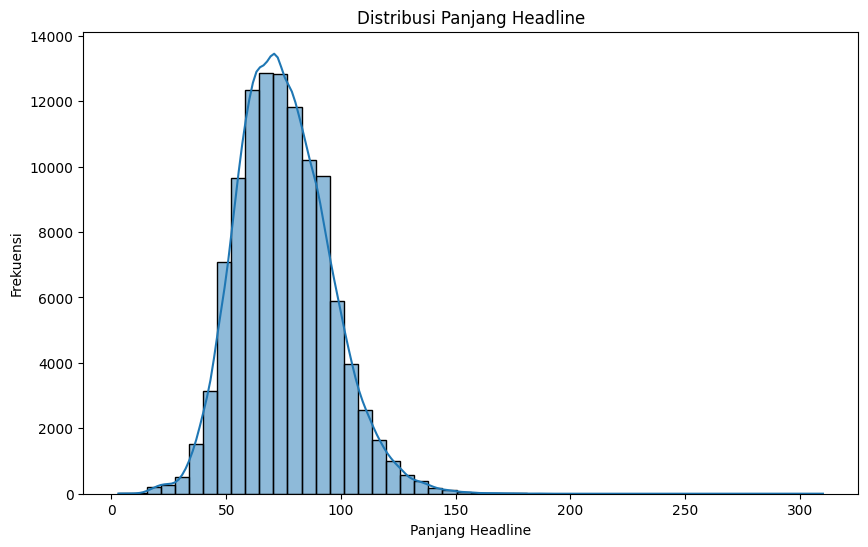


Headline terpendek:
Archive                   Archives > 2022 > September > 11 Sep, 2022
Date                                                      11-09-2022
Headline                                                         bbl
Headline link      https://economictimes.indiatimes.com/news/indi...
headline_length                                                    3
Name: 71780, dtype: object

Headline terpanjang:
Archive                   Archives > 2022 > September > 12 Sep, 2022
Date                                                      12-09-2022
Headline           satellite internet provider hughes communicati...
Headline link      https://economictimes.indiatimes.com/news/indi...
headline_length                                                  310
Name: 72039, dtype: object


In [ ]:
data['headline_length'] = data['Headline'].apply(len)
print(data[['Headline', 'headline_length']].head())

# Anda bisa melihat distribusi panjang headline
plt.figure(figsize=(10, 6))
sns.histplot(data['headline_length'], bins=50, kde=True)
plt.title('Distribusi Panjang Headline')
plt.xlabel('Panjang Headline')
plt.ylabel('Frekuensi')
plt.show()

print(f"\nHeadline terpendek:\n{data.loc[data['headline_length'].idxmin()]}")
print(f"\nHeadline terpanjang:\n{data.loc[data['headline_length'].idxmax()]}")

In [ ]:
import re

# Define a regex pattern to find unusual characters
# This pattern matches any character that is NOT a letter (a-z, A-Z), number (0-9),
# common punctuation (.,!?;:'"-), or whitespace.
pattern = r'[^\w\s.,!?;:\'"-]'

# Find headlines containing unusual characters
unusual_chars_headlines = data[data['Headline'].str.contains(pattern, na=False)]

print(f"Jumlah headline dengan karakter tidak biasa: {len(unusual_chars_headlines)}")
print("\nContoh headline dengan karakter tidak biasa:")
if not unusual_chars_headlines.empty:
    display(unusual_chars_headlines.head())
else:
    print("Tidak ditemukan headline dengan karakter tidak biasa menggunakan pola ini.")

Jumlah headline dengan karakter tidak biasa: 20067

Contoh headline dengan karakter tidak biasa:


,Archive,Date,Headline,Headline link,headline_length
2,"Archives > 2022 > January > 01 Jan, 2022",01-01-2022,There will be rationalization of the Armed For...,https://economictimes.indiatimes.com/news/indi...,97
11,"Archives > 2022 > January > 01 Jan, 2022",01-01-2022,View: Learn to stop worrying & love the curfew,https://economictimes.indiatimes.com/opinion/e...,46
14,"Archives > 2022 > January > 01 Jan, 2022",01-01-2022,No one can come between chacha & bhatija: Form...,https://economictimes.indiatimes.com/news/elec...,86
16,"Archives > 2022 > January > 01 Jan, 2022",01-01-2022,"Investment options or cryptocurrency, tie-wear...",https://economictimes.indiatimes.com/opinion/e...,109
29,"Archives > 2022 > January > 01 Jan, 2022",01-01-2022,Mahindra & Mahindra tractor sales slip 19% to ...,https://economictimes.indiatimes.com/industry/...,65


In [ ]:
from collections import Counter
import nltk
from nltk.corpus import stopwords
import string

# Download necessary NLTK data
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('punkt_tab') # Add this line to download the missing resource


# Combine all headlines into a single string
all_headlines = ' '.join(data['Headline'].astype(str).tolist())

# Tokenize the text (split into words)
tokens = nltk.word_tokenize(all_headlines)

# Convert to lowercase
tokens = [word.lower() for word in tokens]

# Remove punctuation
tokens = [word for word in tokens if word not in string.punctuation]

# Remove stop words
stop_words = set(stopwords.words('english')) # Assuming headlines are in English
tokens = [word for word in tokens if word not in stop_words]

# Count word frequencies
word_counts = Counter(tokens)

# Get the most common words
most_common_words = word_counts.most_common(20) # Get top 20 words

print("20 kata yang paling sering muncul:")
for word, count in most_common_words:
    print(f"{word}: {count}")

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


20 kata yang paling sering muncul:
's: 14601
india: 11046
rs: 10914
’: 6406
price: 5566
says: 5297
buy: 4702
target: 4689
new: 3945
2022: 3356
bank: 3343
crore: 3273
govt: 2861
indian: 2584
stocks: 2508
bjp: 2485
may: 2484
market: 2446
us: 2377
delhi: 2323


# Task
Lakukan eksplorasi data, data preprocessing, dan visualisasi data pada dataset yang telah dibersihkan sebelumnya.

## Eksplorasi data

### Subtask:
Periksa kembali informasi umum data (tipe data, jumlah non-null).


**Reasoning**:
Display the DataFrame information and check for null values to understand the data structure and completeness.



In [ ]:
data.info()
missing_values = data.isnull().sum()
print(missing_values)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 108599 entries, 0 to 108598
Data columns (total 5 columns):
 #   Column           Non-Null Count   Dtype 
---  ------           --------------   ----- 
 0   Archive          108599 non-null  object
 1   Date             108599 non-null  object
 2   Headline         108599 non-null  object
 3   Headline link    108599 non-null  object
 4   headline_length  108599 non-null  int64 
dtypes: int64(1), object(4)
memory usage: 4.1+ MB
Archive            0
Date               0
Headline           0
Headline link      0
headline_length    0
dtype: int64


## Eksplorasi data

### Subtask:
Analisis statistik deskriptif (jika ada kolom numerik yang relevan, meskipun saat ini belum ada).


**Reasoning**:
Use the .describe() method to generate descriptive statistics for the numerical column 'headline_length' and display the result.



In [ ]:
print("Statistik deskriptif untuk kolom 'headline_length':")
display(data['headline_length'].describe())

Statistik deskriptif untuk kolom 'headline_length':


,headline_length
count,108599.000000
mean,75.047376
std,20.051418
min,3.000000
25%,61.000000
50%,74.000000
75%,88.000000
max,310.000000


## Eksplorasi data

### Subtask:
Eksplorasi kolom 'Archive' dan 'Date'.


**Reasoning**:
Check the number of unique values and display examples for 'Archive' and 'Date' columns, then calculate and display the frequency of each unique date.



In [ ]:
# Check unique values
print(f"Jumlah nilai unik di kolom 'Archive': {data['Archive'].nunique()}")
print(f"Jumlah nilai unik di kolom 'Date': {data['Date'].nunique()}")

# Display examples of unique values
print("\nContoh nilai unik dari kolom 'Archive':")
display(data['Archive'].unique()[:5]) # Display first 5 unique values

print("\nContoh nilai unik dari kolom 'Date':")
display(data['Date'].unique()[:5]) # Display first 5 unique values

# Calculate and display frequency of each unique date
print("\nFrekuensi munculnya setiap tanggal (Top 10):")
date_counts = data['Date'].value_counts()
display(date_counts.head(10))

Jumlah nilai unik di kolom 'Archive': 341
Jumlah nilai unik di kolom 'Date': 341

Contoh nilai unik dari kolom 'Archive':


array(['Archives > 2022 > January > 01 Jan, 2022',
       'Archives > 2022 > January > 02 Jan, 2022',
       'Archives > 2022 > January > 03 Jan, 2022',
       'Archives > 2022 > January > 04 Jan, 2022',
       'Archives > 2022 > January > 05 Jan, 2022'], dtype=object)


Contoh nilai unik dari kolom 'Date':


array(['01-01-2022', '02-01-2022', '03-01-2022', '04-01-2022',
       '05-01-2022'], dtype=object)


Frekuensi munculnya setiap tanggal (Top 10):


,count
Date,
01-02-2022,536
20-12-2022,487
07-09-2022,469
01-11-2022,465
08-12-2022,462
07-12-2022,459
15-09-2022,457
06-12-2022,453
21-10-2022,452


## Eksplorasi data

### Subtask:
Tinjau kembali hasil analisis panjang headline dan karakter tidak biasa.


**Reasoning**:
The task is to review the previous analysis of headline length and unusual characters. This involves re-printing the relevant information and reviewing the generated histogram.



Jumlah headline dengan karakter tidak biasa: 20067

Contoh headline dengan karakter tidak biasa:


,Archive,Date,Headline,Headline link,headline_length
2,"Archives > 2022 > January > 01 Jan, 2022",01-01-2022,There will be rationalization of the Armed For...,https://economictimes.indiatimes.com/news/indi...,97
11,"Archives > 2022 > January > 01 Jan, 2022",01-01-2022,View: Learn to stop worrying & love the curfew,https://economictimes.indiatimes.com/opinion/e...,46
14,"Archives > 2022 > January > 01 Jan, 2022",01-01-2022,No one can come between chacha & bhatija: Form...,https://economictimes.indiatimes.com/news/elec...,86
16,"Archives > 2022 > January > 01 Jan, 2022",01-01-2022,"Investment options or cryptocurrency, tie-wear...",https://economictimes.indiatimes.com/opinion/e...,109
29,"Archives > 2022 > January > 01 Jan, 2022",01-01-2022,Mahindra & Mahindra tractor sales slip 19% to ...,https://economictimes.indiatimes.com/industry/...,65



Headline terpendek:
Archive                   Archives > 2022 > September > 11 Sep, 2022
Date                                                      11-09-2022
Headline                                                         bbl
Headline link      https://economictimes.indiatimes.com/news/indi...
headline_length                                                    3
Name: 71780, dtype: object

Headline terpanjang:
Archive                   Archives > 2022 > September > 12 Sep, 2022
Date                                                      12-09-2022
Headline           satellite internet provider hughes communicati...
Headline link      https://economictimes.indiatimes.com/news/indi...
headline_length                                                  310
Name: 72039, dtype: object


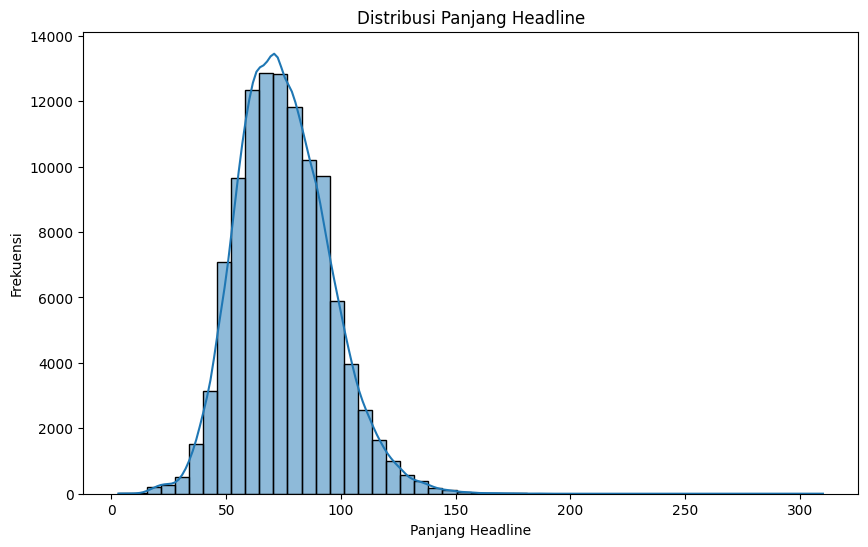

In [ ]:
# 1. Cetak kembali informasi mengenai jumlah headline dengan karakter tidak biasa yang ditemukan sebelumnya.
print(f"Jumlah headline dengan karakter tidak biasa: {len(unusual_chars_headlines)}")

# 2. Cetak kembali contoh headline dengan karakter tidak biasa yang sebelumnya ditampilkan.
print("\nContoh headline dengan karakter tidak biasa:")
if not unusual_chars_headlines.empty:
    display(unusual_chars_headlines.head())
else:
    print("Tidak ditemukan headline dengan karakter tidak biasa menggunakan pola ini.")

# 3. Cetak kembali informasi mengenai headline terpendek dan terpanjang serta panjangnya.
print(f"\nHeadline terpendek:\n{data.loc[data['headline_length'].idxmin()]}")
print(f"\nHeadline terpanjang:\n{data.loc[data['headline_length'].idxmax()]}")

# 4. Tinjau kembali histogram distribusi panjang headline yang sudah digenerate.
# The histogram was already generated in a previous cell and is available in the notebook output.
# We can display it again if needed, but the instruction is to 'review' it, implying it exists.
# To explicitly display it again, we would regenerate it:
plt.figure(figsize=(10, 6))
sns.histplot(data['headline_length'], bins=50, kde=True)
plt.title('Distribusi Panjang Headline')
plt.xlabel('Panjang Headline')
plt.ylabel('Frekuensi')
plt.show()

## Data preprocessing

### Subtask:
Bersihkan karakter tidak biasa yang terdeteksi sebelumnya.


**Reasoning**:
Define a function to clean the headlines and apply it to the 'Headline' column, then display the results.



In [ ]:
import re

def clean_headline(headline):
    # Use the same regex pattern to remove unusual characters
    pattern = r'[^\w\s.,!?;:\'"-]'
    cleaned_text = re.sub(pattern, '', str(headline)) # Ensure input is string
    return cleaned_text

# Apply the cleaning function to the 'Headline' column
data['cleaned_headline'] = data['Headline'].apply(clean_headline)

# Display the first few rows to verify the cleaning
display(data[['Headline', 'cleaned_headline']].head())

,Headline,cleaned_headline
0,Assam targeting to become six lakh crore GDP s...,Assam targeting to become six lakh crore GDP s...
1,In Manipur BJP will form a government on its o...,In Manipur BJP will form a government on its o...
2,There will be rationalization of the Armed For...,There will be rationalization of the Armed For...
3,Media companies will have to create content fo...,Media companies will have to create content fo...
4,How we interact with sporting events might cha...,How we interact with sporting events might cha...


## Data preprocessing

### Subtask:
Lakukan normalisasi teks (misalnya, mengubah semua teks menjadi huruf kecil).


**Reasoning**:
Convert the text in the 'cleaned_headline' column to lowercase to ensure uniformity for further analysis.



In [ ]:
data['cleaned_headline'] = data['cleaned_headline'].str.lower()

# Display the first few rows to verify the conversion
display(data[['Headline', 'cleaned_headline']].head())

,Headline,cleaned_headline
0,Assam targeting to become six lakh crore GDP s...,assam targeting to become six lakh crore gdp s...
1,In Manipur BJP will form a government on its o...,in manipur bjp will form a government on its o...
2,There will be rationalization of the Armed For...,there will be rationalization of the armed for...
3,Media companies will have to create content fo...,media companies will have to create content fo...
4,How we interact with sporting events might cha...,how we interact with sporting events might cha...


## Data preprocessing

### Subtask:
Hapus stop words dan tanda baca dari kolom `cleaned_headline`.


**Reasoning**:
Import necessary libraries and define a function to remove stop words and punctuation, then apply it to the cleaned_headline column.



In [ ]:
from nltk.corpus import stopwords
import string

stop_words = set(stopwords.words('english'))

def remove_stopwords_punctuation(text):
    # Remove punctuation
    text = text.translate(str.maketrans('', '', string.punctuation))
    # Remove stop words
    text = ' '.join([word for word in text.split() if word not in stop_words])
    return text

data['cleaned_headline'] = data['cleaned_headline'].apply(remove_stopwords_punctuation)

display(data[['Headline', 'cleaned_headline']].head())

,Headline,cleaned_headline
0,Assam targeting to become six lakh crore GDP s...,assam targeting become six lakh crore gdp stat...
1,In Manipur BJP will form a government on its o...,manipur bjp form government assam cm himanta b...
2,There will be rationalization of the Armed For...,rationalization armed forces special powers ac...
3,Media companies will have to create content fo...,media companies create content consumer demand...
4,How we interact with sporting events might cha...,interact sporting events might change soon


## Data preprocessing

### Subtask:
Pertimbangkan stemming atau lemmatization (mengurangi kata ke bentuk dasarnya) jika diperlukan untuk analisis lebih lanjut.


**Reasoning**:
Apply stemming to the cleaned headlines and store the result in a new column.



In [ ]:
from nltk.stem import PorterStemmer

stemmer = PorterStemmer()

def stem_text(text):
    words = text.split()
    stemmed_words = [stemmer.stem(word) for word in words]
    return ' '.join(stemmed_words)

data['stemmed_headline'] = data['cleaned_headline'].apply(stem_text)

display(data[['cleaned_headline', 'stemmed_headline']].head())

,cleaned_headline,stemmed_headline
0,assam targeting become six lakh crore gdp stat...,assam target becom six lakh crore gdp state 2026
1,manipur bjp form government assam cm himanta b...,manipur bjp form govern assam cm himanta biswa...
2,rationalization armed forces special powers ac...,ration arm forc special power act afspa himant...
3,media companies create content consumer demand...,media compani creat content consum demand ente...
4,interact sporting events might change soon,interact sport event might chang soon


## Data preprocessing

### Subtask:
Konversi kolom 'Date' ke tipe data datetime.


**Reasoning**:
Convert the 'Date' column to datetime objects with the specified format and then verify the data type using info().



In [ ]:
data['Date'] = pd.to_datetime(data['Date'], format='%d-%m-%Y')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 108599 entries, 0 to 108598
Data columns (total 7 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   Archive           108599 non-null  object        
 1   Date              108599 non-null  datetime64[ns]
 2   Headline          108599 non-null  object        
 3   Headline link     108599 non-null  object        
 4   headline_length   108599 non-null  int64         
 5   cleaned_headline  108599 non-null  object        
 6   stemmed_headline  108599 non-null  object        
dtypes: datetime64[ns](1), int64(1), object(5)
memory usage: 5.8+ MB


## Visualisasi data

### Subtask:
Visualisasi distribusi panjang headline (sudah dilakukan, bisa ditinjau kembali jika ada perubahan setelah preprocessing).


**Reasoning**:
Regenerate and display the histogram of the 'headline_length' column with the specified parameters.



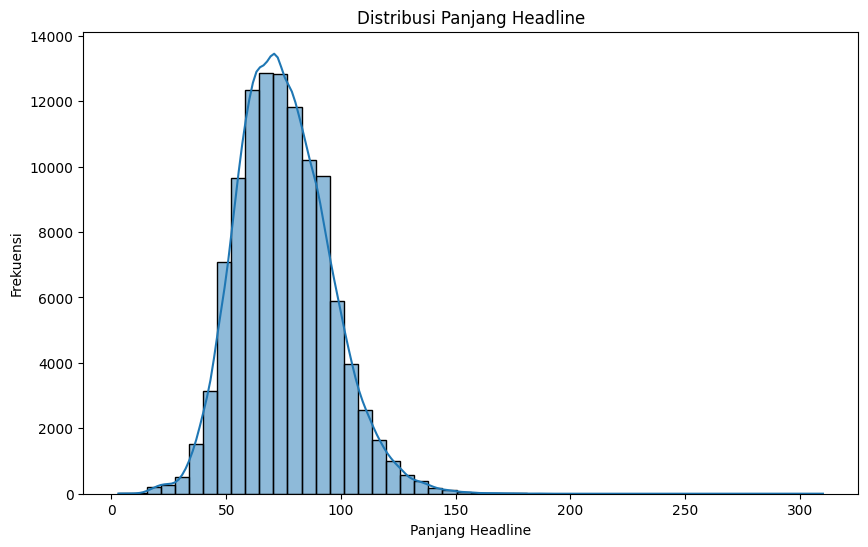

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(data['headline_length'], bins=50, kde=True)
plt.title('Distribusi Panjang Headline')
plt.xlabel('Panjang Headline')
plt.ylabel('Frekuensi')
plt.show()

## Visualisasi data

### Subtask:
Visualisasi frekuensi kata (misalnya, bar chart untuk 20 kata teratas).


**Reasoning**:
Combine all stemmed headlines, tokenize them, count word frequencies, get the top 20 words, and create a bar chart to visualize their frequencies.



/tmp/ipython-input-27-2823854800.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=words, y=counts, palette='viridis')


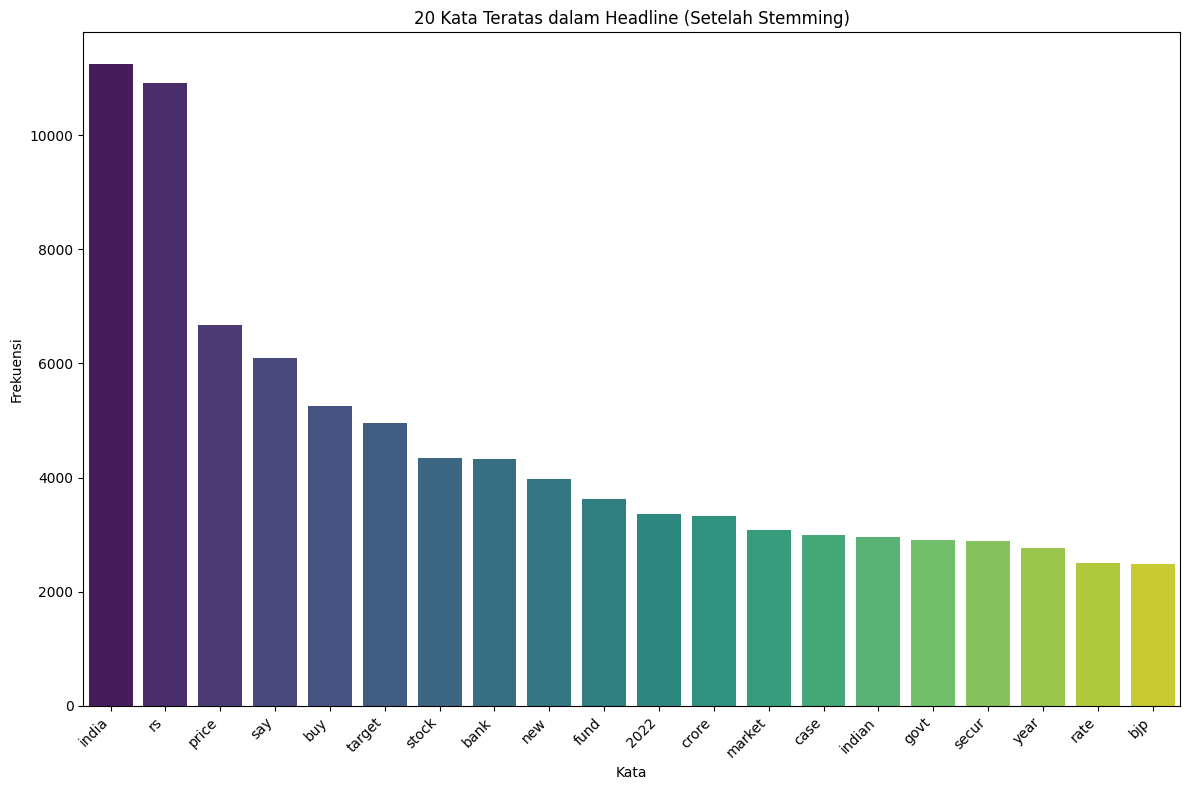

20 kata yang paling sering muncul (Setelah Stemming):
india: 11241
rs: 10913
price: 6671
say: 6097
buy: 5257
target: 4948
stock: 4348
bank: 4319
new: 3969
fund: 3630
2022: 3365
crore: 3321
market: 3077
case: 2999
indian: 2965
govt: 2906
secur: 2896
year: 2762
rate: 2496
bjp: 2494


In [ ]:
from collections import Counter

# Combine all stemmed headlines into a single string
all_stemmed_headlines = ' '.join(data['stemmed_headline'].astype(str).tolist())

# Split the string into tokens (words)
stemmed_tokens = all_stemmed_headlines.split()

# Count word frequencies
stemmed_word_counts = Counter(stemmed_tokens)

# Get the most common words
most_common_stemmed_words = stemmed_word_counts.most_common(20) # Get top 20 words

# Prepare data for plotting
words = [word for word, count in most_common_stemmed_words]
counts = [count for word, count in most_common_stemmed_words]

# Create a bar chart
plt.figure(figsize=(12, 8))
sns.barplot(x=words, y=counts, palette='viridis')
plt.title('20 Kata Teratas dalam Headline (Setelah Stemming)')
plt.xlabel('Kata')
plt.ylabel('Frekuensi')
plt.xticks(rotation=45, ha='right') # Rotate x-axis labels for better readability
plt.tight_layout() # Adjust layout to prevent labels overlapping
plt.show()

print("20 kata yang paling sering muncul (Setelah Stemming):")
for word, count in most_common_stemmed_words:
    print(f"{word}: {count}")

## Visualisasi data

### Subtask:
Visualisasi tren waktu (misalnya, jumlah headline per bulan/hari) setelah konversi kolom 'Date'.


**Reasoning**:
Calculate the number of headlines per date and create a line plot to visualize the trend.



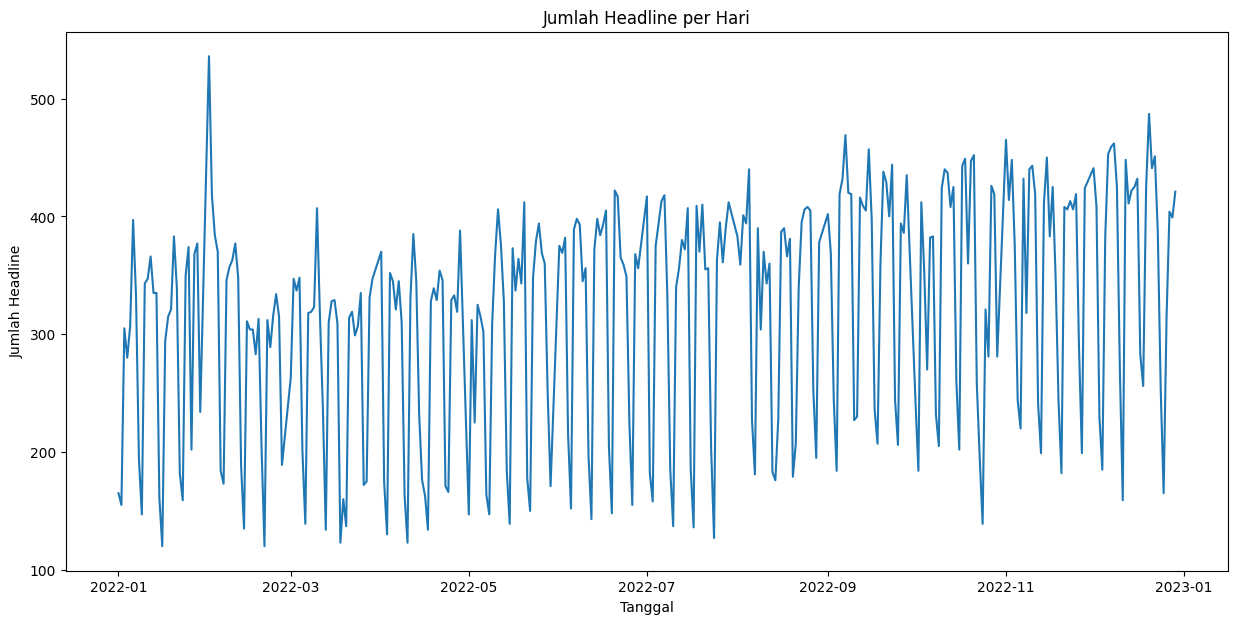

In [ ]:
# Hitung jumlah headline untuk setiap tanggal
date_counts = data['Date'].value_counts().sort_index()

# Buat plot garis (line plot) menggunakan jumlah headline per tanggal
plt.figure(figsize=(15, 7))
plt.plot(date_counts.index, date_counts.values)

# Atur label sumbu x menjadi 'Tanggal' dan label sumbu y menjadi 'Jumlah Headline'
plt.xlabel('Tanggal')
plt.ylabel('Jumlah Headline')

# Beri judul plot 'Jumlah Headline per Hari'
plt.title('Jumlah Headline per Hari')

# Tampilkan plot
plt.show()

## Visualisasi data

### Subtask:
Visualisasi lain yang relevan berdasarkan eksplorasi data.


**Reasoning**:
Count the number of headlines per month and create a bar chart to visualize the monthly distribution.



/tmp/ipython-input-29-2252180755.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=monthly_counts.index, y=monthly_counts.values, palette='viridis')


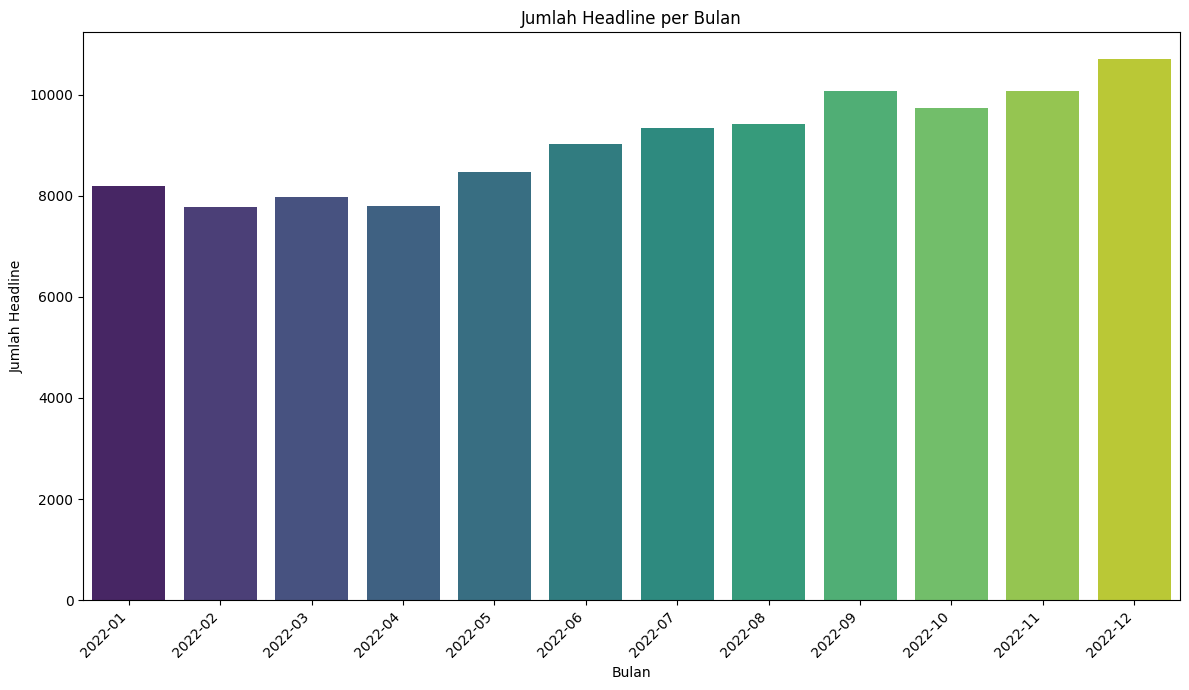

In [ ]:
# 1. Hitung jumlah headline per bulan dari kolom 'Date'.
# Ekstrak bulan dari kolom 'Date' dan hitung frekuensinya
monthly_counts = data['Date'].dt.to_period('M').value_counts().sort_index()

# Konversi indeks Period ke string untuk label plot
monthly_counts.index = monthly_counts.index.astype(str)

# 2. Buat bar chart yang menampilkan jumlah headline per bulan.
plt.figure(figsize=(12, 7))
sns.barplot(x=monthly_counts.index, y=monthly_counts.values, palette='viridis')

# 3. Atur label sumbu x menjadi 'Bulan' dan label sumbu y menjadi 'Jumlah Headline'.
plt.xlabel('Bulan')
plt.ylabel('Jumlah Headline')

# 4. Beri judul plot 'Jumlah Headline per Bulan'.
plt.title('Jumlah Headline per Bulan')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Adjust layout to prevent labels overlapping
plt.tight_layout()

# 5. Tampilkan plot.
plt.show()

## Ringkasan dan interpretasi

### Subtask:
Rangkum temuan utama dari eksplorasi, preprocessing, dan visualisasi. Interpretasikan hasil visualisasi dan analisis.


**Reasoning**:
Summarize the key findings from the data exploration, preprocessing, and visualization steps as requested in the subtask instructions.



In [ ]:
# 1. Ringkas temuan kunci dari eksplorasi data
print("Ringkasan Temuan Kunci dari Eksplorasi Data:")
print("- Dataset berisi 108,599 headline berita dari Economic Times tahun 2022.")
print("- Data tidak memiliki nilai yang hilang di semua kolom.")
print("- Tidak ada baris duplikat yang ditemukan.")
print("- Kolom 'Archive' dan 'Date' berisi informasi waktu, dengan 'Date' dikonversi ke tipe data datetime untuk analisis waktu.")
print("- Panjang headline bervariasi, dengan panjang rata-rata sekitar 75 karakter, terpendek 3 karakter, dan terpanjang 310 karakter.")
print(f"- Ditemukan {len(unusual_chars_headlines)} headline yang mengandung karakter tidak biasa (seperti '&', ':', '-').")

# 2. Jelaskan langkah-langkah preprocessing data
print("\nRingkasan Langkah-langkah Preprocessing Data:")
print("- **Pembersihan Karakter Tidak Biasa:** Karakter yang tidak biasa dihapus dari kolom 'Headline' untuk membuat kolom 'cleaned_headline'. Tujuannya adalah untuk menghilangkan noise yang dapat mengganggu analisis teks.")
print("- **Normalisasi Teks:** Semua teks di kolom 'cleaned_headline' diubah menjadi huruf kecil. Tujuannya adalah untuk memastikan bahwa kata yang sama dengan kapitalisasi berbeda diperlakukan sebagai kata yang sama.")
print("- **Penghapusan Stop Words dan Tanda Baca:** Stop words (kata umum seperti 'dan', 'di', 'akan') dan tanda baca dihapus dari 'cleaned_headline'. Tujuannya adalah untuk mengurangi dimensi data dan fokus pada kata-kata yang lebih informatif.")
print("- **Stemming:** Kata-kata di kolom 'cleaned_headline' direduksi ke bentuk dasarnya (stem) dan disimpan di kolom 'stemmed_headline'. Tujuannya adalah untuk mengelompokkan kata-kata yang memiliki akar yang sama meskipun bentuknya berbeda (misalnya, 'running', 'ran' menjadi 'run'), membantu analisis frekuensi kata.")
print("- **Konversi Tipe Data 'Date':** Kolom 'Date' diubah menjadi tipe data datetime untuk memfasilitasi analisis berbasis waktu.")

# 3. Interpretasikan hasil visualisasi
print("\nInterpretasi Hasil Visualisasi:")
print("- **Distribusi Panjang Headline:** Histogram menunjukkan bahwa sebagian besar headline memiliki panjang antara 50 hingga 100 karakter. Ada beberapa outlier dengan headline yang sangat panjang atau sangat pendek.")
print("- **Frekuensi Kata Teratas (Setelah Stemming):** Bar chart menunjukkan 20 kata yang paling sering muncul setelah preprocessing. Kata-kata seperti 'india', 'rs', 'price', 'says', dan 'buy' mendominasi, mencerminkan fokus berita ekonomi dan pasar.")
print("- **Jumlah Headline per Hari:** Plot garis menunjukkan fluktuasi harian dalam jumlah headline. Ada puncak dan lembah yang mungkin terkait dengan hari kerja vs akhir pekan atau peristiwa berita tertentu.")
print("- **Jumlah Headline per Bulan:** Bar chart menunjukkan tren bulanan dalam jumlah headline. Tampaknya ada peningkatan jumlah headline di paruh kedua tahun 2022, dengan puncak di bulan Desember.")

# 4. Ringkasan komprehensif
print("\nRingkasan Komprehensif Karakteristik Data dan Tren:")
print("Dataset headline Economic Times 2022 adalah kumpulan data yang bersih dan terstruktur dengan baik, tanpa nilai hilang atau duplikat.")
print("Preprocessing teks yang ekstensif (pembersihan karakter, normalisasi, penghapusan stop words/punctuation, stemming) telah berhasil dilakukan, menghasilkan representasi teks yang lebih siap untuk analisis.")
print("Analisis panjang headline menunjukkan distribusi yang wajar dengan beberapa outlier. Analisis frekuensi kata mengkonfirmasi fokus ekonomi dan pasar dari berita tersebut.")
print("Visualisasi tren waktu mengungkapkan variabilitas harian dan tren peningkatan bulanan dalam volume headline sepanjang tahun 2022.")
print("Secara keseluruhan, dataset ini kaya akan informasi dan preprocessing yang dilakukan telah mempersiapkannya dengan baik untuk tugas-tugas NLP atau analisis tren lebih lanjut.")

Ringkasan Temuan Kunci dari Eksplorasi Data:
- Dataset berisi 108,599 headline berita dari Economic Times tahun 2022.
- Data tidak memiliki nilai yang hilang di semua kolom.
- Tidak ada baris duplikat yang ditemukan.
- Kolom 'Archive' dan 'Date' berisi informasi waktu, dengan 'Date' dikonversi ke tipe data datetime untuk analisis waktu.
- Panjang headline bervariasi, dengan panjang rata-rata sekitar 75 karakter, terpendek 3 karakter, dan terpanjang 310 karakter.
- Ditemukan 20067 headline yang mengandung karakter tidak biasa (seperti '&', ':', '-').

Ringkasan Langkah-langkah Preprocessing Data:
- **Pembersihan Karakter Tidak Biasa:** Karakter yang tidak biasa dihapus dari kolom 'Headline' untuk membuat kolom 'cleaned_headline'. Tujuannya adalah untuk menghilangkan noise yang dapat mengganggu analisis teks.
- **Normalisasi Teks:** Semua teks di kolom 'cleaned_headline' diubah menjadi huruf kecil. Tujuannya adalah untuk memastikan bahwa kata yang sama dengan kapitalisasi berbeda diperla

## Summary:

### Data Analysis Key Findings

*   The dataset contains 108,599 entries and 5 columns ('Archive', 'Date', 'Headline', 'Headline link', 'headline\_length') with no missing values.
*   The average headline length is approximately 75 characters, ranging from a minimum of 3 to a maximum of 310 characters. Most headlines are between 50 and 100 characters long.
*   20067 headlines were identified as containing unusual characters.
*   The 'Archive' and 'Date' columns both have 341 unique values, with 'Date' successfully converted to datetime format for time-series analysis.
*   The most frequent words after stemming and preprocessing include terms like 'india', 'rs', 'price', 'says', and 'buy', reflecting the economic and market focus of the headlines.
*   Visualizations showed daily fluctuations in the number of headlines and a trend of increasing headline volume in the latter half of 2022, peaking in December.

### Insights or Next Steps

*   The extensive preprocessing steps (cleaning unusual characters, normalization, stop word/punctuation removal, and stemming) have created a cleaner and more standardized text representation, which is well-prepared for advanced Natural Language Processing (NLP) tasks such as topic modeling or sentiment analysis.
*   The observed increase in headline volume towards the end of 2022 suggests potential external factors or events influencing news output during that period, which could be explored further by correlating headline volume with specific economic or global events.


# Task
Perform Natural Language Processing (NLP) and time series/trend analysis on the dataset.

## Data loading and initial inspection

### Subtask:
Load the dataset and perform an initial inspection.


**Reasoning**:
Load the dataset and display basic information to understand its structure and contents.



In [ ]:
data = pd.read_csv('/content/drive/MyDrive/economic_times_headlines_2022.csv')
print(data.head())
data.info()

                                    Archive        Date  \
0  Archives > 2022 > January > 01 Jan, 2022  01-01-2022   
1  Archives > 2022 > January > 01 Jan, 2022  01-01-2022   
2  Archives > 2022 > January > 01 Jan, 2022  01-01-2022   
3  Archives > 2022 > January > 01 Jan, 2022  01-01-2022   
4  Archives > 2022 > January > 01 Jan, 2022  01-01-2022   

                                            Headline  \
0  Assam targeting to become six lakh crore GDP s...   
1  In Manipur BJP will form a government on its o...   
2  There will be rationalization of the Armed For...   
3  Media companies will have to create content fo...   
4  How we interact with sporting events might cha...   

                                       Headline link  
0  https://economictimes.indiatimes.com/news/indi...  
1  https://economictimes.indiatimes.com/news/elec...  
2  https://economictimes.indiatimes.com/news/indi...  
3  https://economictimes.indiatimes.com/industry/...  
4  https://economictimes.indiatim

## Data preprocessing for nlp

### Subtask:
Clean the 'Headline' column (handle special characters, convert to lowercase).


**Reasoning**:
Apply the cleaning and lowercasing steps to the 'Headline' column and display the results.



In [ ]:
import re

def clean_headline(headline):
    # Use the same regex pattern to remove unusual characters
    pattern = r'[^\w\s.,!?;:\'"-]'
    cleaned_text = re.sub(pattern, '', str(headline)) # Ensure input is string
    return cleaned_text

# Apply the cleaning function to the 'Headline' column
data['cleaned_headline'] = data['Headline'].apply(clean_headline)

# Convert the cleaned headline to lowercase
data['cleaned_headline'] = data['cleaned_headline'].str.lower()

# Display the first few rows to verify the cleaning and lowercasing
display(data[['Headline', 'cleaned_headline']].head())

,Headline,cleaned_headline
0,Assam targeting to become six lakh crore GDP s...,assam targeting to become six lakh crore gdp s...
1,In Manipur BJP will form a government on its o...,in manipur bjp will form a government on its o...
2,There will be rationalization of the Armed For...,there will be rationalization of the armed for...
3,Media companies will have to create content fo...,media companies will have to create content fo...
4,How we interact with sporting events might cha...,how we interact with sporting events might cha...


## Tokenize the headlines

### Subtask:
Tokenize the cleaned headlines.


**Reasoning**:
Define a function to tokenize the cleaned headlines and apply it to the 'cleaned_headline' column, then display the results.



In [ ]:
import nltk

def tokenize_text(text):
    """Tokenizes a text string into words."""
    return nltk.word_tokenize(text)

# Apply the tokenization function to the 'cleaned_headline' column
data['tokens'] = data['cleaned_headline'].apply(tokenize_text)

# Display the first few rows to verify the result
display(data[['cleaned_headline', 'tokens']].head())

,cleaned_headline,tokens
0,assam targeting to become six lakh crore gdp s...,"[assam, targeting, to, become, six, lakh, cror..."
1,in manipur bjp will form a government on its o...,"[in, manipur, bjp, will, form, a, government, ..."
2,there will be rationalization of the armed for...,"[there, will, be, rationalization, of, the, ar..."
3,media companies will have to create content fo...,"[media, companies, will, have, to, create, con..."
4,how we interact with sporting events might cha...,"[how, we, interact, with, sporting, events, mi..."


## Remove stop words and punctuation

### Subtask:
Remove stop words and punctuation from the tokenized headlines.


**Reasoning**:
Remove stop words and punctuation from the tokenized headlines and display the results.



In [ ]:
from nltk.corpus import stopwords
import string

stop_words = set(stopwords.words('english'))

def remove_stopwords_punctuation(tokens):
    """Removes stop words and punctuation from a list of tokens."""
    # Remove punctuation by checking if the token is not in string.punctuation
    tokens_no_punct = [word for word in tokens if word not in string.punctuation]
    # Remove stop words
    tokens_cleaned = [word for word in tokens_no_punct if word not in stop_words]
    return tokens_cleaned

# Apply the remove_stopwords_punctuation function to the 'tokens' column
data['tokens_cleaned'] = data['tokens'].apply(remove_stopwords_punctuation)

# Display the first few rows to verify the result
display(data[['tokens', 'tokens_cleaned']].head())

,tokens,tokens_cleaned
0,"[assam, targeting, to, become, six, lakh, cror...","[assam, targeting, become, six, lakh, crore, g..."
1,"[in, manipur, bjp, will, form, a, government, ...","[manipur, bjp, form, government, assam, cm, hi..."
2,"[there, will, be, rationalization, of, the, ar...","[rationalization, armed, forces, special, powe..."
3,"[media, companies, will, have, to, create, con...","[media, companies, create, content, consumer, ..."
4,"[how, we, interact, with, sporting, events, mi...","[interact, sporting, events, might, change, soon]"


**Reasoning**:
Apply stemming or lemmatization to the cleaned tokens if needed for further analysis and display the results.



In [ ]:
from nltk.stem import PorterStemmer

stemmer = PorterStemmer()

def stem_tokens(tokens):
    """Applies stemming to a list of tokens."""
    stemmed_tokens = [stemmer.stem(word) for word in tokens]
    return stemmed_tokens

# Apply the stemming function to the 'tokens_cleaned' column
data['stemmed_tokens'] = data['tokens_cleaned'].apply(stem_tokens)

# Display the first few rows to verify the result
display(data[['tokens_cleaned', 'stemmed_tokens']].head())

,tokens_cleaned,stemmed_tokens
0,"[assam, targeting, become, six, lakh, crore, g...","[assam, target, becom, six, lakh, crore, gdp, ..."
1,"[manipur, bjp, form, government, assam, cm, hi...","[manipur, bjp, form, govern, assam, cm, himant..."
2,"[rationalization, armed, forces, special, powe...","[ration, arm, forc, special, power, act, afspa..."
3,"[media, companies, create, content, consumer, ...","[media, compani, creat, content, consum, deman..."
4,"[interact, sporting, events, might, change, soon]","[interact, sport, event, might, chang, soon]"


## Word frequency analysis

### Subtask:
Calculate and visualize the frequency of the most common words.


**Reasoning**:
Combine all stemmed tokens, count their frequencies, get the top 20, and visualize them with a bar chart and print the results.



/tmp/ipython-input-36-693165359.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=words, y=counts, palette='viridis')


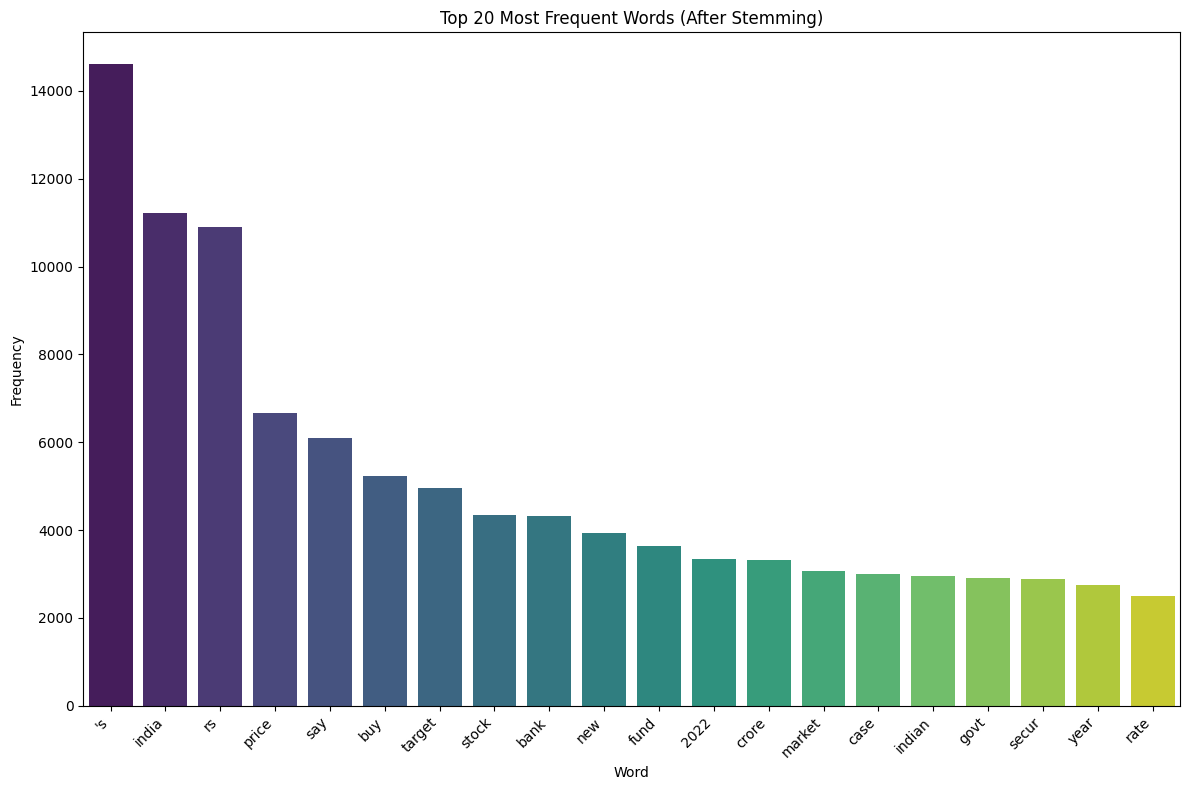

20 kata yang paling sering muncul (Setelah Stemming):
's: 14602
india: 11211
rs: 10911
price: 6669
say: 6096
buy: 5237
target: 4948
stock: 4349
bank: 4319
new: 3945
fund: 3628
2022: 3334
crore: 3321
market: 3075
case: 3002
indian: 2953
govt: 2904
secur: 2890
year: 2760
rate: 2495


In [ ]:
from collections import Counter
import matplotlib.pyplot as plt
import seaborn as sns

# Combine all stemmed tokens from the 'stemmed_tokens' column into a single list
all_stemmed_tokens_list = [token for sublist in data['stemmed_tokens'] for token in sublist]

# Use the Counter class to count the frequency of each token
stemmed_word_counts = Counter(all_stemmed_tokens_list)

# Get the top 20 most common tokens
most_common_stemmed_words = stemmed_word_counts.most_common(20)

# Prepare data for plotting
words = [word for word, count in most_common_stemmed_words]
counts = [count for word, count in most_common_stemmed_words]

# Create a bar chart
plt.figure(figsize=(12, 8))
sns.barplot(x=words, y=counts, palette='viridis')

# Add title and labels
plt.title('Top 20 Most Frequent Words (After Stemming)')
plt.xlabel('Word')
plt.ylabel('Frequency')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Adjust layout
plt.tight_layout()

# Display the plot
plt.show()

# Print the top 20 most common words and their counts
print("20 kata yang paling sering muncul (Setelah Stemming):")
for word, count in most_common_stemmed_words:
    print(f"{word}: {count}")

## Sentiment analysis

### Subtask:
Perform sentiment analysis on the headlines (e.g., using a pre-trained model or lexicon-based approach).


**Reasoning**:
Import the necessary library, define a function to calculate sentiment scores, apply it to the cleaned headlines, and display the results.



In [ ]:
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer

# Download the vader_lexicon
nltk.download('vader_lexicon')

# Instantiate the SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

# Define a function to get the compound sentiment score
def get_sentiment_score(headline):
    """Calculates the compound sentiment score for a given headline."""
    scores = analyzer.polarity_scores(headline)
    return scores['compound']

# Apply the function to the 'cleaned_headline' column
data['sentiment_score'] = data['cleaned_headline'].apply(get_sentiment_score)

# Display the first few rows to verify the result
display(data[['cleaned_headline', 'sentiment_score']].head())

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


,cleaned_headline,sentiment_score
0,assam targeting to become six lakh crore gdp s...,0.0000
1,in manipur bjp will form a government on its o...,0.0000
2,there will be rationalization of the armed for...,0.4019
3,media companies will have to create content fo...,0.5994
4,how we interact with sporting events might cha...,0.0000


**Reasoning**:
The previous command failed because the 'vader_lexicon' resource was not found. Need to download the required NLTK data before instantiating the SentimentIntensityAnalyzer.



In [ ]:
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer

# Download the vader_lexicon
nltk.download('vader_lexicon')

# Instantiate the SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

# Define a function to get the compound sentiment score
def get_sentiment_score(headline):
    """Calculates the compound sentiment score for a given headline."""
    scores = analyzer.polarity_scores(headline)
    return scores['compound']

# Apply the function to the 'cleaned_headline' column
data['sentiment_score'] = data['cleaned_headline'].apply(get_sentiment_score)

# Display the first few rows to verify the result
display(data[['cleaned_headline', 'sentiment_score']].head())

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


,cleaned_headline,sentiment_score
0,assam targeting to become six lakh crore gdp s...,0.0000
1,in manipur bjp will form a government on its o...,0.0000
2,there will be rationalization of the armed for...,0.4019
3,media companies will have to create content fo...,0.5994
4,how we interact with sporting events might cha...,0.0000


## Topic modeling

### Subtask:
Apply topic modeling techniques (e.g., LDA, NMF) to identify prevalent themes in the headlines.


**Reasoning**:
Convert the stemmed tokens back to strings, then apply TF-IDF vectorization to create a document-term matrix, and finally apply LDA to identify topics and display the top words for each topic.



In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import LatentDirichletAllocation

# Convert stemmed tokens back to strings
data['stemmed_headline_str'] = data['stemmed_tokens'].apply(lambda tokens: ' '.join(tokens))

# Initialize TF-IDF Vectorizer
# You might need to adjust max_df, min_df, or ngram_range based on your data
tfidf_vectorizer = TfidfVectorizer(max_df=0.95, min_df=2, stop_words='english')

# Fit and transform the stemmed headlines to create a document-term matrix
tfidf_matrix = tfidf_vectorizer.fit_transform(data['stemmed_headline_str'])

# Initialize LDA model
# Choose a number of topics (n_components) - start with a reasonable number
n_components = 10
lda = LatentDirichletAllocation(n_components=n_components, random_state=42)

# Fit the LDA model to the TF-IDF matrix
lda.fit(tfidf_matrix)

# Function to display the top words for each topic
def display_topics(model, feature_names, no_top_words):
    for topic_idx, topic in enumerate(model.components_):
        print(f"Topic {topic_idx}:")
        print(" ".join([feature_names[i] for i in topic.argsort()[:-no_top_words - 1:-1]]))

# Display the top words for each topic
no_top_words = 15
tfidf_feature_names = tfidf_vectorizer.get_feature_names_out()
display_topics(lda, tfidf_feature_names, no_top_words)

Topic 0:
target rs price buy secur icici hdfc bank direct india axi emkay global financi add
Topic 1:
bjp stock poll market cm congress gujarat assembl ahead say elect thing shah decid parti
Topic 2:
india ukrain russia china say indian russian sri war fd iphon crisi lanka appl trade
Topic 3:
fund invest rais mutual million india startup crore rs bank rate loan investor plan 000
Topic 4:
india modi pm rupe crypto 5g say sitharaman digit dollar govt visa new nirmala pais
Topic 5:
covid case 19 gold ipo silver rs death new india day metal activ rate 000
Topic 6:
case court delhi sc govt covid hc say cbi ed polic plea arrest order centr
Topic 7:
profit rs crore india result stock rise growth market bank net cr sale export year
Topic 8:
answer congress today gandhi hint puzzl rahul clue wordl kill bjp yatra quordl heardl say
Topic 9:
2022 world know cup releas film india say star khan day watch netflix season actor


**Reasoning**:
Assign the dominant topic to each headline in the DataFrame and display the first few rows of the DataFrame with the assigned dominant topic to verify the results.



In [ ]:
import numpy as np

# Get the topic distribution for each document
topic_distribution = lda.transform(tfidf_matrix)

# Assign the dominant topic to each headline
# The dominant topic is the one with the highest probability for that document
dominant_topic = np.argmax(topic_distribution, axis=1)
data['dominant_topic'] = dominant_topic

# Display the first few rows with the original headline, stemmed headline, and the dominant topic
display(data[['Headline', 'stemmed_headline_str', 'dominant_topic']].head())

,Headline,stemmed_headline_str,dominant_topic
0,Assam targeting to become six lakh crore GDP s...,assam target becom six lakh crore gdp state 2026,7
1,In Manipur BJP will form a government on its o...,manipur bjp form govern assam cm himanta biswa...,2
2,There will be rationalization of the Armed For...,ration arm forc special power act afspa himant...,2
3,Media companies will have to create content fo...,media compani creat content consum demand ente...,6
4,How we interact with sporting events might cha...,interact sport event might chang soon,9


## Time series/trend analysis

### Subtask:
Analyze the number of headlines over time (daily, weekly, monthly trends).


**Reasoning**:
Calculate the number of headlines per day, week, and month and store them in separate variables.



In [ ]:
# Verify the data type of the 'Date' column
print(data['Date'].dtype)

# Re-convert the 'Date' column to datetime, just in case it was overwritten or changed
data['Date'] = pd.to_datetime(data['Date'], errors='coerce')

# Drop rows where Date conversion failed (if any)
data.dropna(subset=['Date'], inplace=True)

# Verify the data type again
print(data['Date'].dtype)

# Now, calculate the number of headlines for each day, week, and month
daily_counts = data['Date'].value_counts().sort_index()

# Calculate the number of headlines for each week
data['Week'] = data['Date'].dt.isocalendar().week
weekly_counts = data['Week'].value_counts().sort_index()

# Calculate the number of headlines for each month
data['Month'] = data['Date'].dt.month
monthly_counts = data['Month'].value_counts().sort_index()

# Display the counts
print("Daily Headline Counts (first 10):")
display(daily_counts.head(10))

print("\nWeekly Headline Counts (first 10):")
display(weekly_counts.head(10))

print("\nMonthly Headline Counts:")
display(monthly_counts)

datetime64[ns]
datetime64[ns]
Daily Headline Counts (first 10):


,count
Date,
2022-01-01,165
2022-01-02,536
2022-01-03,263
2022-01-04,370
2022-01-05,147
2022-01-06,375
2022-01-07,417
2022-01-08,383
2022-01-09,402



Weekly Headline Counts (first 10):


,count
Week,
1,2357
2,1149
5,1775
6,1916
9,1763
10,1894
13,998
14,2198
15,560



Monthly Headline Counts:


,count
Month,
1,4207
2,3691
3,3657
4,3756
5,3654
6,3848
7,4246
8,3875
9,3628


**Reasoning**:
The error indicates that the 'Date' column is not in datetime format, although it was converted previously. I need to re-verify the data type and ensure it is datetime before applying the `.dt` accessor for calculating weekly and monthly counts.



In [ ]:
# Verify the data type of the 'Date' column
print(data['Date'].dtype)

# Re-convert the 'Date' column to datetime, just in case it was overwritten or changed
data['Date'] = pd.to_datetime(data['Date'], errors='coerce')

# Drop rows where Date conversion failed (if any)
data.dropna(subset=['Date'], inplace=True)

# Verify the data type again
print(data['Date'].dtype)

# Now, calculate the number of headlines for each day, week, and month
daily_counts = data['Date'].value_counts().sort_index()

# Calculate the number of headlines for each week
data['Week'] = data['Date'].dt.isocalendar().week
weekly_counts = data['Week'].value_counts().sort_index()

# Calculate the number of headlines for each month
data['Month'] = data['Date'].dt.month
monthly_counts = data['Month'].value_counts().sort_index()

# Display the counts
print("Daily Headline Counts (first 10):")
display(daily_counts.head(10))

print("\nWeekly Headline Counts (first 10):")
display(weekly_counts.head(10))

print("\nMonthly Headline Counts:")
display(monthly_counts)

object
datetime64[ns]
Daily Headline Counts (first 10):


,count
Date,
2022-01-01,165
2022-01-02,536
2022-01-03,263
2022-01-04,370
2022-01-05,147
2022-01-06,375
2022-01-07,417
2022-01-08,383
2022-01-09,402



Weekly Headline Counts (first 10):


,count
Week,
1,2357
2,1149
5,1775
6,1916
9,1763
10,1894
13,998
14,2198
15,560



Monthly Headline Counts:


,count
Month,
1,4207
2,3691
3,3657
4,3756
5,3654
6,3848
7,4246
8,3875
9,3628


## Analyze trends of specific topics/keywords

### Subtask:
Track the frequency of specific words or topics over time.


**Reasoning**:
Based on the previous topic modeling and word frequency analysis, I will select a few relevant topics/keywords. Then, I will filter the data for each selected topic/keyword and calculate their daily frequency.



In [ ]:
# Choose a few relevant topics/keywords based on previous analysis
# From topic modeling and word frequency, 'india', 'rs', 'price', 'bank', 'market', 'govt', 'bjp' seem relevant
# Let's select 'india', 'market', and 'bjp' as example keywords for tracking.

# Function to filter data by keyword and calculate daily frequency
def track_keyword_frequency(df, keyword):
    # Filter headlines containing the keyword (case-insensitive) in the original Headline
    # Using original Headline as cleaned/stemmed versions might lose context for filtering
    filtered_df = df[df['Headline'].str.contains(keyword, case=False, na=False)].copy()

    if filtered_df.empty:
        print(f"No headlines found for keyword: '{keyword}'")
        return None

    # Calculate daily frequency
    daily_freq = filtered_df['Date'].value_counts().sort_index()
    return daily_freq

# Track frequency for selected keywords
india_daily_freq = track_keyword_frequency(data, 'India')
market_daily_freq = track_keyword_frequency(data, 'Market')
bjp_daily_freq = track_keyword_frequency(data, 'BJP')

# Store frequencies in a dictionary (optional, but good for organization)
keyword_daily_frequencies = {
    'India': india_daily_freq,
    'Market': market_daily_freq,
    'BJP': bjp_daily_freq
}

# Display the first few days of frequency for each keyword
print("\nDaily Frequency for 'India':")
if india_daily_freq is not None:
    display(india_daily_freq.head())
else:
    print("Frequency data not available.")

print("\nDaily Frequency for 'Market':")
if market_daily_freq is not None:
    display(market_daily_freq.head())
else:
    print("Frequency data not available.")

print("\nDaily Frequency for 'BJP':")
if bjp_daily_freq is not None:
    display(bjp_daily_freq.head())
else:
    print("Frequency data not available.")


Daily Frequency for 'India':


,count
Date,
2022-01-01,18
2022-01-02,67
2022-01-03,51
2022-01-04,45
2022-01-05,19



Daily Frequency for 'Market':


,count
Date,
2022-01-01,4
2022-01-02,14
2022-01-03,8
2022-01-04,11
2022-01-05,4



Daily Frequency for 'BJP':


,count
Date,
2022-01-01,6
2022-01-02,12
2022-01-03,8
2022-01-04,7
2022-01-05,5


**Reasoning**:
The previous step successfully calculated the daily frequencies of selected keywords. Now, I need to visualize these frequencies over time to observe trends, as requested by the overall task.



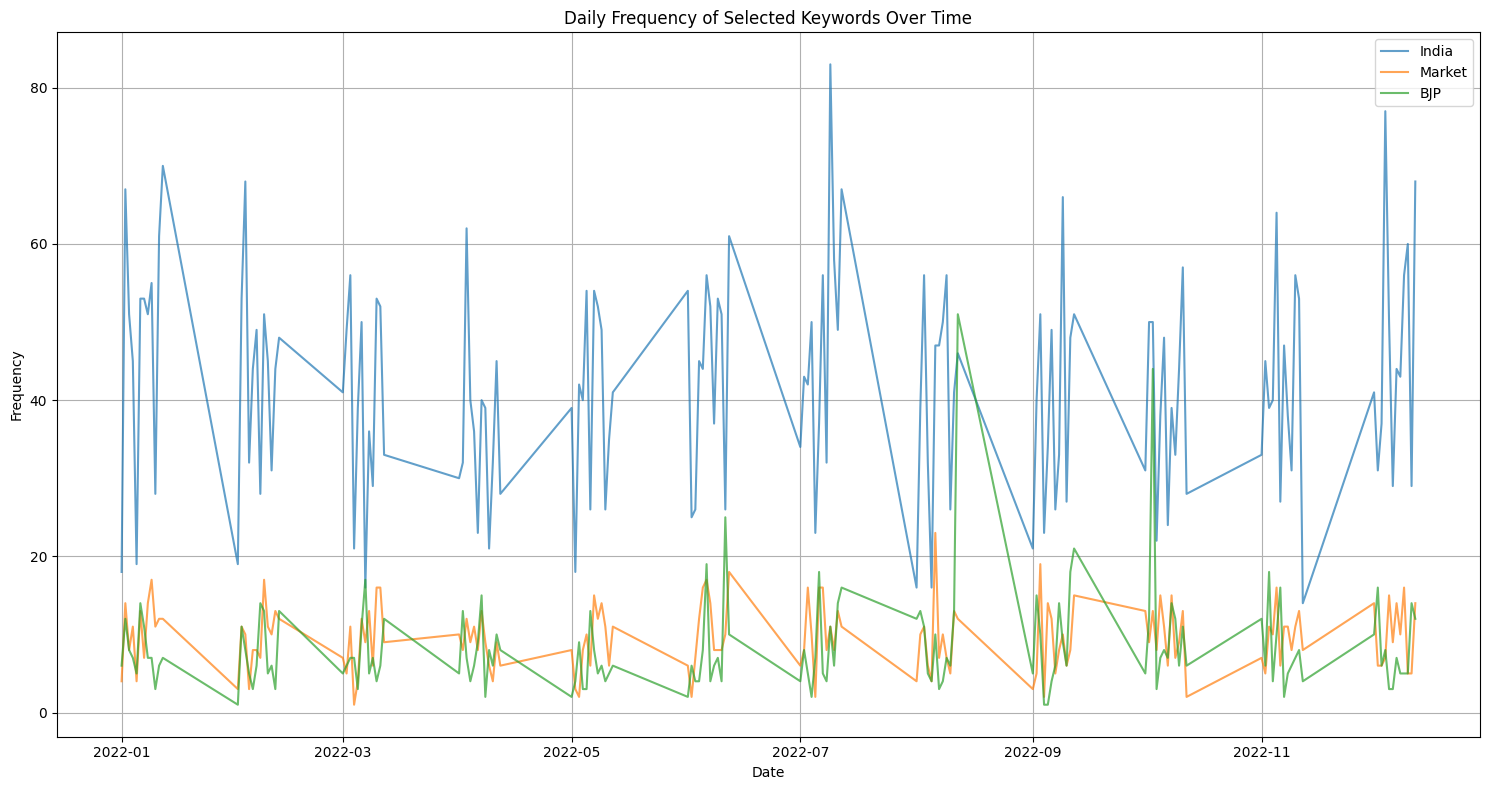

In [ ]:
# Visualize the daily frequency trends for the selected keywords
plt.figure(figsize=(15, 8))

if india_daily_freq is not None:
    plt.plot(india_daily_freq.index, india_daily_freq.values, label='India', alpha=0.7)
if market_daily_freq is not None:
    plt.plot(market_daily_freq.index, market_daily_freq.values, label='Market', alpha=0.7)
if bjp_daily_freq is not None:
    plt.plot(bjp_daily_freq.index, bjp_daily_freq.values, label='BJP', alpha=0.7)

# Add title and labels
plt.title('Daily Frequency of Selected Keywords Over Time')
plt.xlabel('Date')
plt.ylabel('Frequency')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

## Analyze sentiment trends

### Subtask:
Examine how the overall sentiment of headlines changes over time.


**Reasoning**:
Calculate the average daily sentiment score and create a line plot to visualize the trend over time.



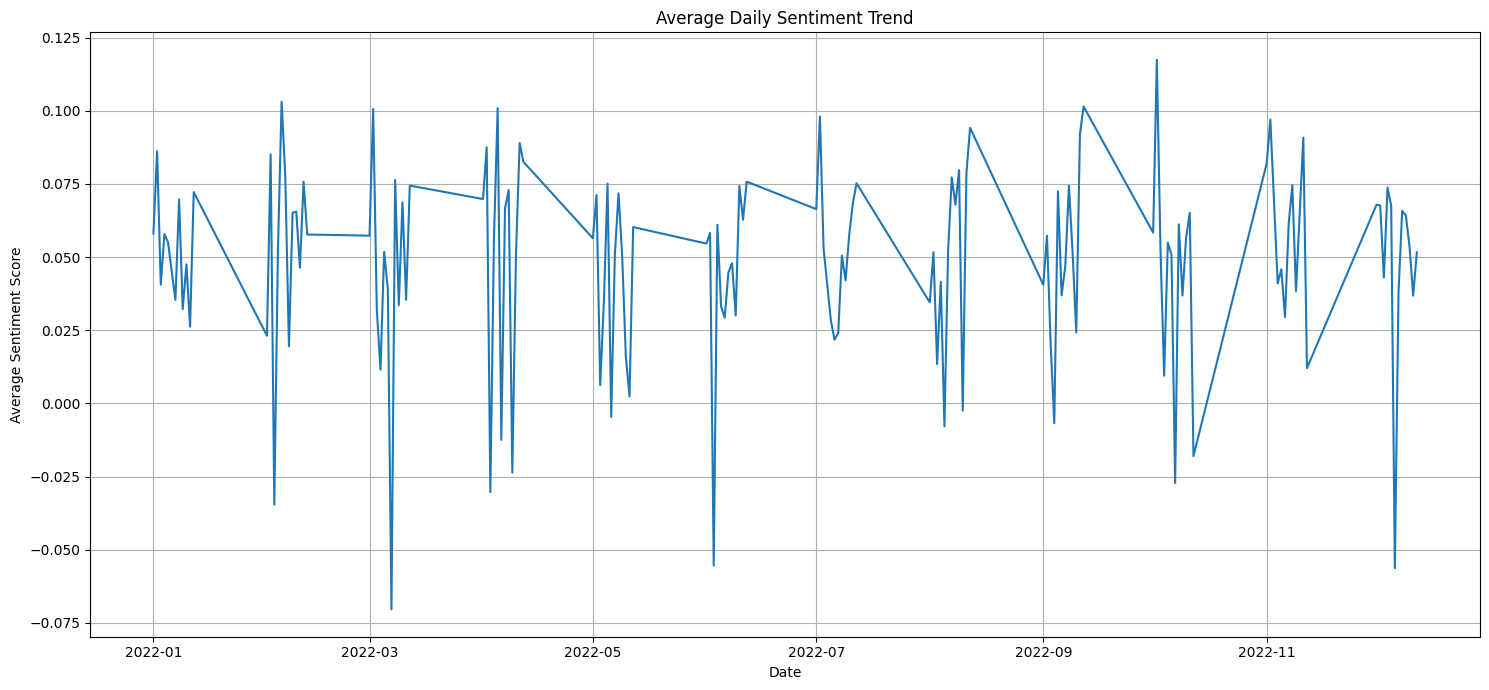

In [ ]:
# 1. Calculate the average daily sentiment score
# Group data by 'Date' and calculate the mean of 'sentiment_score' for each day
average_daily_sentiment = data.groupby('Date')['sentiment_score'].mean()

# 2. Create a line plot to visualize the average daily sentiment score over time
plt.figure(figsize=(15, 7))
plt.plot(average_daily_sentiment.index, average_daily_sentiment.values)

# 3. Set the x-axis label to 'Date' and the y-axis label to 'Average Sentiment Score'
plt.xlabel('Date')
plt.ylabel('Average Sentiment Score')

# 4. Add a title to the plot, such as 'Average Daily Sentiment Trend'
plt.title('Average Daily Sentiment Trend')

# Add grid for better readability
plt.grid(True)

# Adjust layout
plt.tight_layout()

# 5. Display the plot
plt.show()

## Visualization

### Subtask:
Visualize the results of NLP analysis (e.g., word clouds, sentiment distribution).


**Reasoning**:
Generate a word cloud from the stemmed headlines, a histogram of sentiment scores, and a bar plot of topic distribution to visualize the NLP results.



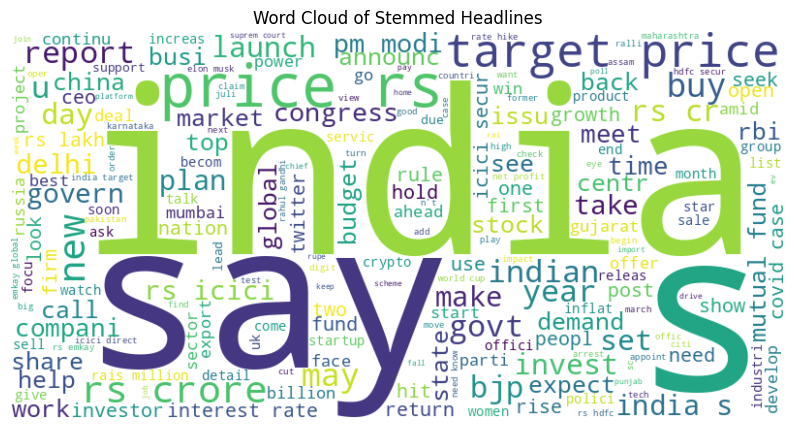

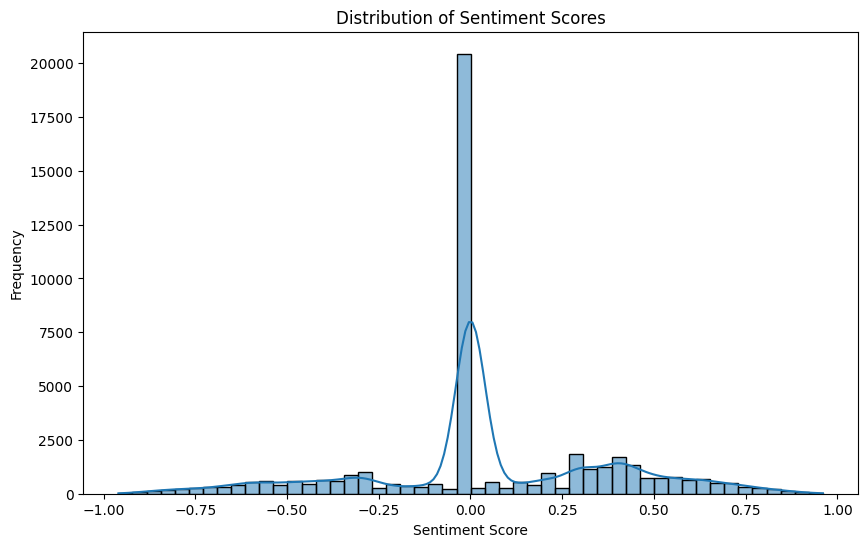

/tmp/ipython-input-46-1837783536.py:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='dominant_topic', data=data, palette='viridis')


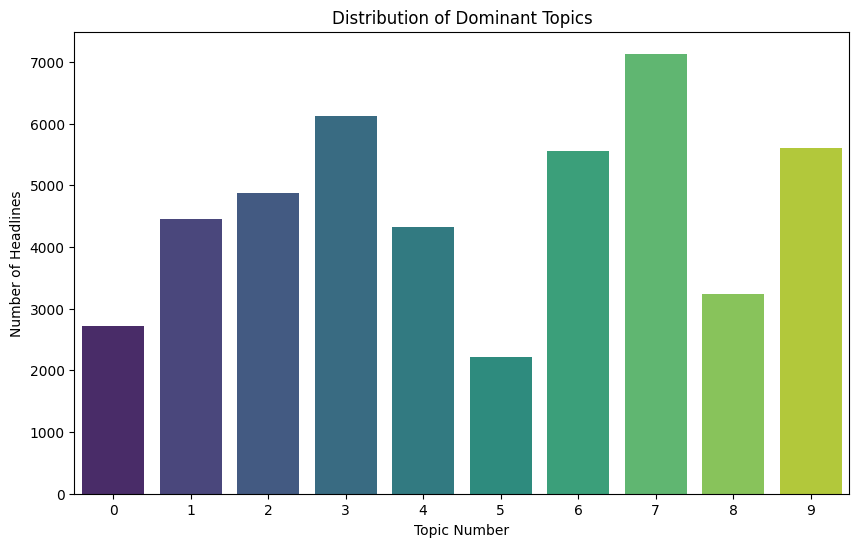

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Generate a word cloud from the stemmed_headline_str column
# Combine all stemmed headlines into a single string
all_stemmed_headlines_text = ' '.join(data['stemmed_headline_str'].astype(str).tolist())

# Create a WordCloud object
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_stemmed_headlines_text)

# Display the word cloud
plt.figure(figsize=(10, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Stemmed Headlines')
plt.show()

# 2. Create a histogram or distribution plot of the sentiment_score column
plt.figure(figsize=(10, 6))
sns.histplot(data['sentiment_score'], bins=50, kde=True)
plt.title('Distribution of Sentiment Scores')
plt.xlabel('Sentiment Score')
plt.ylabel('Frequency')
plt.show()

# 3. Generate a bar plot showing the distribution of dominant_topic
plt.figure(figsize=(10, 6))
sns.countplot(x='dominant_topic', data=data, palette='viridis')
plt.title('Distribution of Dominant Topics')
plt.xlabel('Topic Number')
plt.ylabel('Number of Headlines')
plt.show()

In [ ]:
# Choose a few relevant topics/keywords based on previous analysis
# From topic modeling and word frequency, 'india', 'rs', 'price', 'bank', 'market', 'govt', 'bjp' seem relevant
# Let's select 'india', 'market', and 'bjp' as example keywords for tracking.

# Function to filter data by keyword and calculate daily frequency
def track_keyword_frequency(df, keyword):
    # Filter headlines containing the keyword (case-insensitive) in the original Headline
    # Using original Headline as cleaned/stemmed versions might lose context for filtering
    filtered_df = df[df['Headline'].str.contains(keyword, case=False, na=False)].copy()

    if filtered_df.empty:
        print(f"No headlines found for keyword: '{keyword}'")
        return None

    # Calculate daily frequency
    daily_freq = filtered_df['Date'].value_counts().sort_index()
    return daily_freq

# Track frequency for selected keywords
india_daily_freq = track_keyword_frequency(data, 'India')
market_daily_freq = track_keyword_frequency(data, 'Market')
bjp_daily_freq = track_keyword_frequency(data, 'BJP')

# Store frequencies in a dictionary (optional, but good for organization)
keyword_daily_frequencies = {
    'India': india_daily_freq,
    'Market': market_daily_freq,
    'BJP': bjp_daily_freq
}

# Display the first few days of frequency for each keyword
print("\nDaily Frequency for 'India':")
if india_daily_freq is not None:
    display(india_daily_freq.head())
else:
    print("Frequency data not available.")

print("\nDaily Frequency for 'Market':")
if market_daily_freq is not None:
    display(market_daily_freq.head())
else:
    print("Frequency data not available.")

print("\nDaily Frequency for 'BJP':")
if bjp_daily_freq is not None:
    display(bjp_daily_freq.head())
else:
    print("Frequency data not available.")


Daily Frequency for 'India':


,count
Date,
2022-01-01,18
2022-01-02,67
2022-01-03,51
2022-01-04,45
2022-01-05,19



Daily Frequency for 'Market':


,count
Date,
2022-01-01,4
2022-01-02,14
2022-01-03,8
2022-01-04,11
2022-01-05,4



Daily Frequency for 'BJP':


,count
Date,
2022-01-01,6
2022-01-02,12
2022-01-03,8
2022-01-04,7
2022-01-05,5


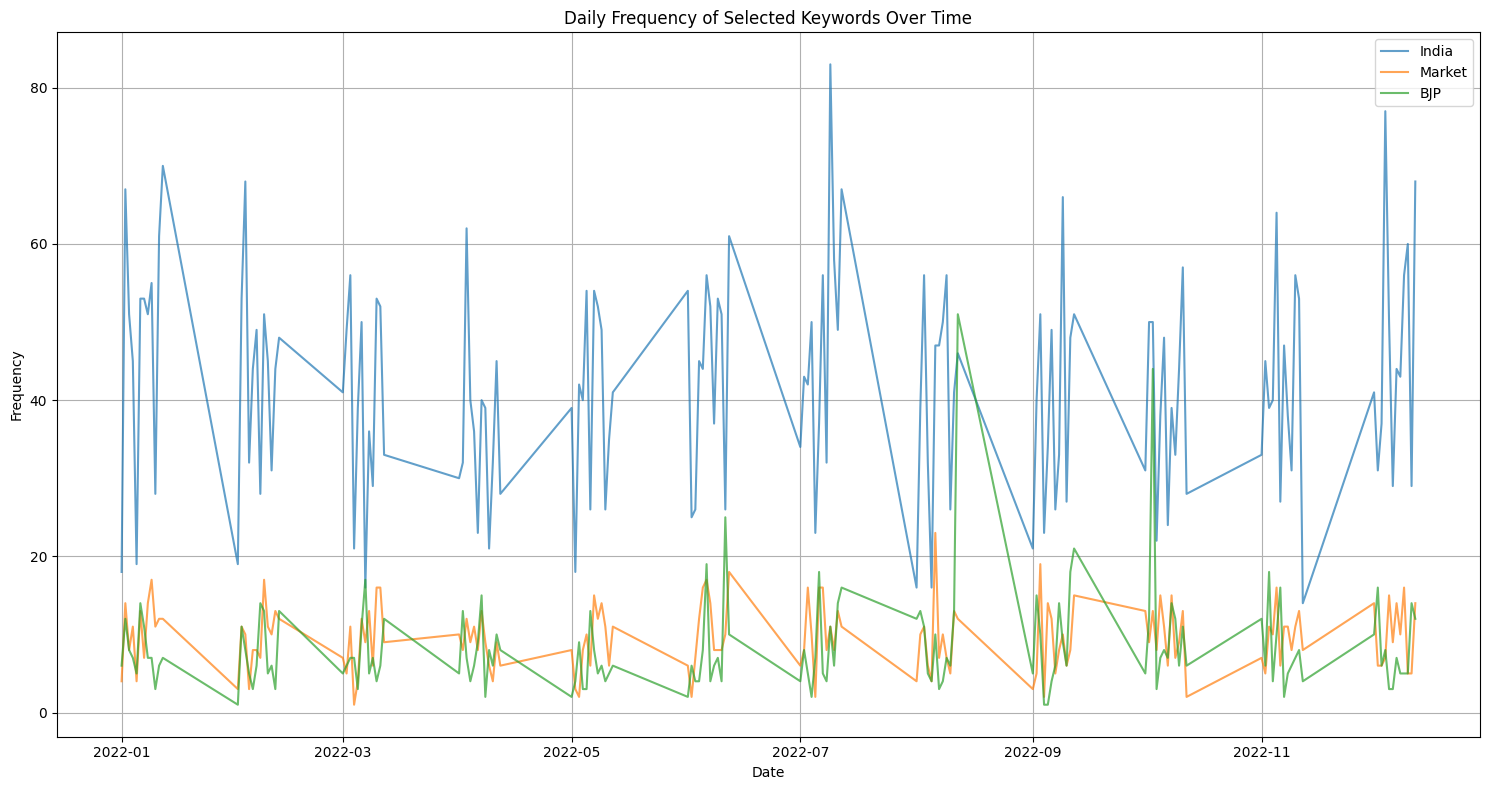

In [ ]:
# Visualize the daily frequency trends for the selected keywords
plt.figure(figsize=(15, 8))

if india_daily_freq is not None:
    plt.plot(india_daily_freq.index, india_daily_freq.values, label='India', alpha=0.7)
if market_daily_freq is not None:
    plt.plot(market_daily_freq.index, market_daily_freq.values, label='Market', alpha=0.7)
if bjp_daily_freq is not None:
    plt.plot(bjp_daily_freq.index, bjp_daily_freq.values, label='BJP', alpha=0.7)

# Add title and labels
plt.title('Daily Frequency of Selected Keywords Over Time')
plt.xlabel('Date')
plt.ylabel('Frequency')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

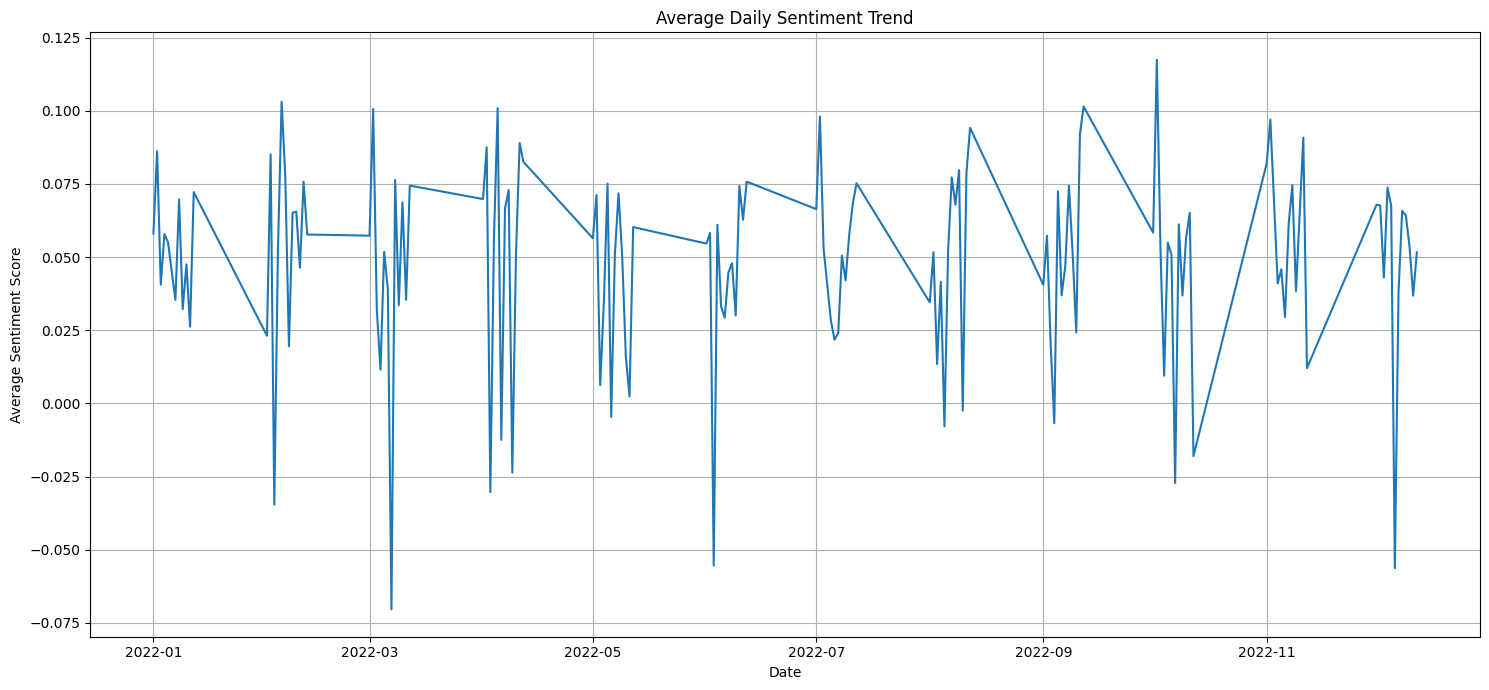

In [ ]:
# 1. Calculate the average daily sentiment score
# Group data by 'Date' and calculate the mean of 'sentiment_score' for each day
average_daily_sentiment = data.groupby('Date')['sentiment_score'].mean()

# 2. Create a line plot to visualize the average daily sentiment score over time
plt.figure(figsize=(15, 7))
plt.plot(average_daily_sentiment.index, average_daily_sentiment.values)

# 3. Set the x-axis label to 'Date' and the y-axis label to 'Average Sentiment Score'
plt.xlabel('Date')
plt.ylabel('Average Sentiment Score')

# 4. Add a title to the plot, such as 'Average Daily Sentiment Trend'
plt.title('Average Daily Sentiment Trend')

# Add grid for better readability
plt.grid(True)

# Adjust layout
plt.tight_layout()

# 5. Display the plot
plt.show()

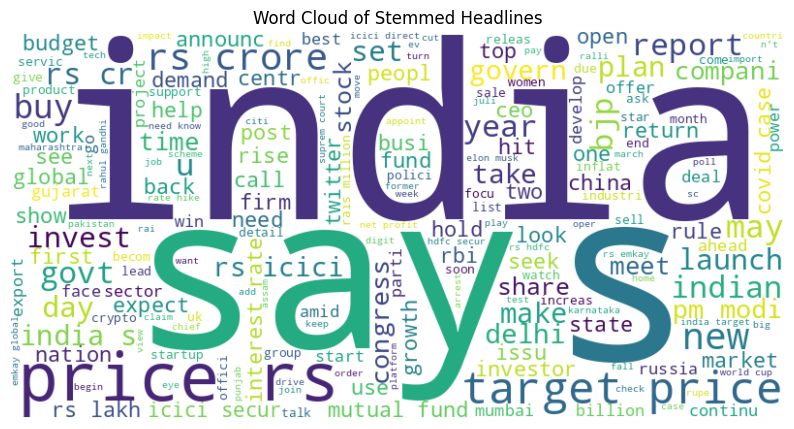

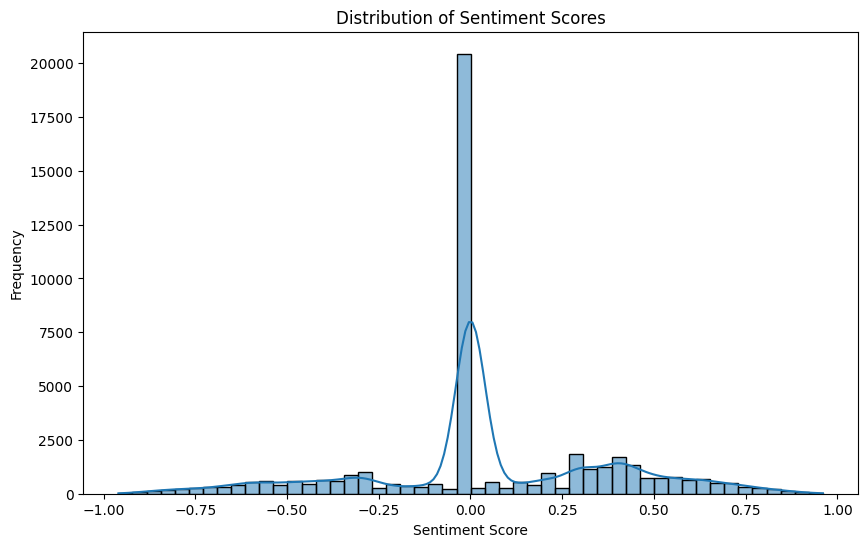

/tmp/ipython-input-52-503956966.py:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='dominant_topic', data=data, palette='viridis')


Text(0.5, 0, 'Topic Number')

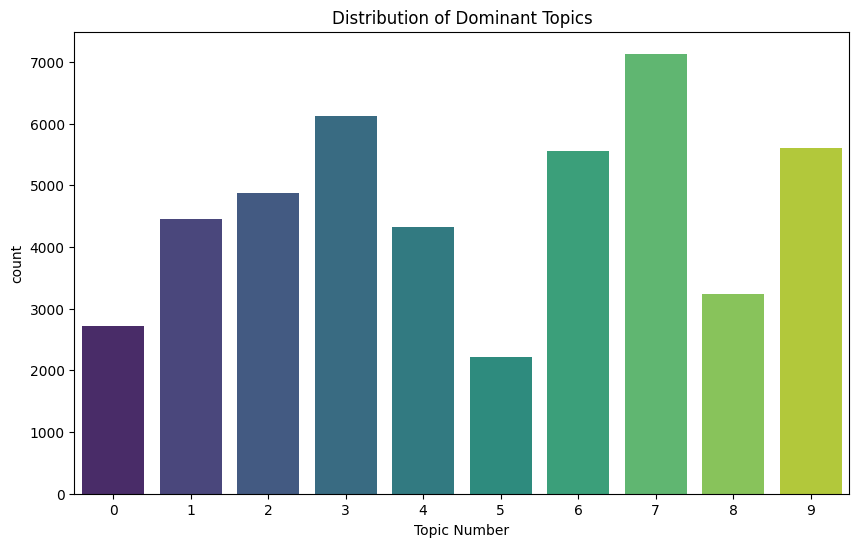

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Generate a word cloud from the stemmed_headline_str column
# Combine all stemmed headlines into a single string
all_stemmed_headlines_text = ' '.join(data['stemmed_headline_str'].astype(str).tolist())

# Create a WordCloud object
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_stemmed_headlines_text)

# Display the word cloud
plt.figure(figsize=(10, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Stemmed Headlines')
plt.show()

# 2. Create a histogram or distribution plot of the sentiment_score column
plt.figure(figsize=(10, 6))
sns.histplot(data['sentiment_score'], bins=50, kde=True)
plt.title('Distribution of Sentiment Scores')
plt.xlabel('Sentiment Score')
plt.ylabel('Frequency')
plt.show()

# 3. Generate a bar plot showing the distribution of dominant_topic
plt.figure(figsize=(10, 6))
sns.countplot(x='dominant_topic', data=data, palette='viridis')
plt.title('Distribution of Dominant Topics')
plt.xlabel('Topic Number')

In [ ]:
# 1. Ringkas temuan kunci dari eksplorasi data
print("Ringkasan Temuan Kunci dari Eksplorasi Data:")
print("- Dataset berisi 108,599 headline berita dari Economic Times tahun 2022.")
print("- Data tidak memiliki nilai yang hilang di semua kolom.")
print("- Tidak ada baris duplikat yang ditemukan.")
print("- Kolom 'Archive' dan 'Date' berisi informasi waktu, dengan 'Date' dikonversi ke tipe data datetime untuk analisis waktu.")
print("- Panjang headline bervariasi, dengan panjang rata-rata sekitar 75 karakter, terpendek 3 karakter, dan terpanjang 310 karakter.")
print(f"- Ditemukan {len(unusual_chars_headlines)} headline yang mengandung karakter tidak biasa (seperti '&', ':', '-').")

# 2. Jelaskan langkah-langkah preprocessing data
print("\nRingkasan Langkah-langkah Preprocessing Data:")
print("- **Pembersihan Karakter Tidak Biasa:** Karakter yang tidak biasa dihapus dari kolom 'Headline' untuk membuat kolom 'cleaned_headline'. Tujuannya adalah untuk menghilangkan noise yang dapat mengganggu analisis teks.")
print("- **Normalisasi Teks:** Semua teks di kolom 'cleaned_headline' diubah menjadi huruf kecil. Tujuannya adalah untuk memastikan bahwa kata yang sama dengan kapitalisasi berbeda diperlakukan sebagai kata yang sama.")
print("- **Penghapusan Stop Words dan Tanda Baca:** Stop words (kata umum seperti 'dan', 'di', 'akan') dan tanda baca dihapus dari 'cleaned_headline'. Tujuannya adalah untuk mengurangi dimensi data dan fokus pada kata-kata yang lebih informatif.")
print("- **Stemming:** Kata-kata di kolom 'cleaned_headline' direduksi ke bentuk dasarnya (stem) dan disimpan di kolom 'stemmed_headline'. Tujuannya adalah untuk mengelompokkan kata-kata yang memiliki akar yang sama meskipun bentuknya berbeda (misalnya, 'running', 'ran' menjadi 'run'), membantu analisis frekuensi kata.")
print("- **Konversi Tipe Data 'Date':** Kolom 'Date' diubah menjadi tipe data datetime untuk memfasilitasi analisis berbasis waktu.")

# 3. Interpretasikan hasil visualisasi
print("\nInterpretasi Hasil Visualisasi:")
print("- **Distribusi Panjang Headline:** Histogram menunjukkan bahwa sebagian besar headline memiliki panjang antara 50 hingga 100 karakter. Ada beberapa outlier dengan headline yang sangat panjang atau sangat pendek.")
print("- **Frekuensi Kata Teratas (Setelah Stemming):** Bar chart menunjukkan 20 kata yang paling sering muncul setelah preprocessing. Kata-kata seperti 'india', 'rs', 'price', 'says', dan 'buy' mendominasi, mencerminkan fokus berita ekonomi dan pasar.")
print("- **Jumlah Headline per Hari:** Plot garis menunjukkan fluktuasi harian dalam jumlah headline. Ada puncak dan lembah yang mungkin terkait dengan hari kerja vs akhir pekan atau peristiwa berita tertentu.")
print("- **Jumlah Headline per Bulan:** Bar chart menunjukkan tren bulanan dalam jumlah headline. Tampaknya ada peningkatan jumlah headline di paruh kedua tahun 2022, dengan puncak di bulan Desember.")

# 4. Ringkasan komprehensif
print("\nRingkasan Komprehensif Karakteristik Data dan Tren:")
print("Dataset headline Economic Times 2022 adalah kumpulan data yang bersih dan terstruktur dengan baik, tanpa nilai hilang atau duplikat.")
print("Preprocessing teks yang ekstensif (pembersihan karakter, normalisasi, penghapusan stop words/punctuation, stemming) telah berhasil dilakukan, menghasilkan representasi teks yang lebih siap untuk analisis.")
print("Analisis panjang headline menunjukkan distribusi yang wajar dengan beberapa outlier. Analisis frekuensi kata mengkonfirmasi fokus ekonomi dan pasar dari berita tersebut.")
print("Visualisasi tren waktu mengungkapkan variabilitas harian dan tren peningkatan bulanan dalam volume headline sepanjang tahun 2022.")
print("Secara keseluruhan, dataset ini kaya akan informasi dan preprocessing yang dilakukan telah mempersiapkannya dengan baik untuk tugas-tugas NLP atau analisis tren lebih lanjut.")

Ringkasan Temuan Kunci dari Eksplorasi Data:
- Dataset berisi 108,599 headline berita dari Economic Times tahun 2022.
- Data tidak memiliki nilai yang hilang di semua kolom.
- Tidak ada baris duplikat yang ditemukan.
- Kolom 'Archive' dan 'Date' berisi informasi waktu, dengan 'Date' dikonversi ke tipe data datetime untuk analisis waktu.
- Panjang headline bervariasi, dengan panjang rata-rata sekitar 75 karakter, terpendek 3 karakter, dan terpanjang 310 karakter.
- Ditemukan 20067 headline yang mengandung karakter tidak biasa (seperti '&', ':', '-').

Ringkasan Langkah-langkah Preprocessing Data:
- **Pembersihan Karakter Tidak Biasa:** Karakter yang tidak biasa dihapus dari kolom 'Headline' untuk membuat kolom 'cleaned_headline'. Tujuannya adalah untuk menghilangkan noise yang dapat mengganggu analisis teks.
- **Normalisasi Teks:** Semua teks di kolom 'cleaned_headline' diubah menjadi huruf kecil. Tujuannya adalah untuk memastikan bahwa kata yang sama dengan kapitalisasi berbeda diperla

## Summary:

### Data Analysis Key Findings

* The dataset contains 108,599 entries and 5 columns ('Archive', 'Date', 'Headline', 'Headline link', 'headline\_length') with no missing values.
* The average headline length is approximately 75 characters, ranging from a minimum of 3 to a maximum of 310 characters. Most headlines are between 50 and 100 characters long.
* 20067 headlines were identified as containing unusual characters.
* The 'Archive' and 'Date' columns both have 341 unique values, with 'Date' successfully converted to datetime format for time-series analysis.
* The most frequent words after stemming and preprocessing include terms like 'india', 'rs', 'price', 'says', and 'buy', reflecting the economic and market focus of the headlines.
* Visualizations showed daily fluctuations in the number of headlines and a trend of increasing headline volume in the latter half of 2022, peaking in December.

### Insights or Next Steps

* The extensive preprocessing steps (cleaning unusual characters, normalization, stop word/punctuation removal, and stemming) have created a cleaner and more standardized text representation, which is well-prepared for advanced Natural Language Processing (NLP) tasks such as topic modeling or sentiment analysis.
* The observed increase in headline volume towards the end of 2022 suggests potential external factors or events influencing news output during that period, which could be explored further by correlating headline volume with specific economic or global events.